In [6]:
# Import needed modules 
# numpy will be used to convert lists to arrays and to use log, exp and fitting functions
import numpy as np 
# matplotlib will be used for plotting
import matplotlib.pyplot as plt
from tabulate import tabulate


#### After the researcher did the fitting, she obtained the following values:
    qsat = 4.72 mmol/g
    k(263) = 6.75e-06 1/Pa
    k(303) = 1.48e-06 1/Pa
    k(343) = 5.16e-07 1/Pa

#### Use the Van't Hoff equation to obtain k0 and Q


 The value of ln(k0) is: -22.971 and the value of k0 is: 1.056e-10 1/Pa

 The activation energy is: -24144 J/mol
+-------------------+--------------+---------------------+-------------------+
|       k [1/Pa]    |     ln(k)    |   Temperatures [K]  |      1/T [1/K]    |
+===================+==============+=====================+===================+
|          6.75e-06 |     -14.4772 |           263       |        0.00291545 |
+-------------------+--------------+---------------------+-------------------+
|          1.48e-06 |     -13.4235 |           303       |        0.00330033 |
+-------------------+--------------+---------------------+-------------------+
|          5.16e-07 |     -11.906  |           343       |        0.00380228 |
+-------------------+--------------+---------------------+-------------------+


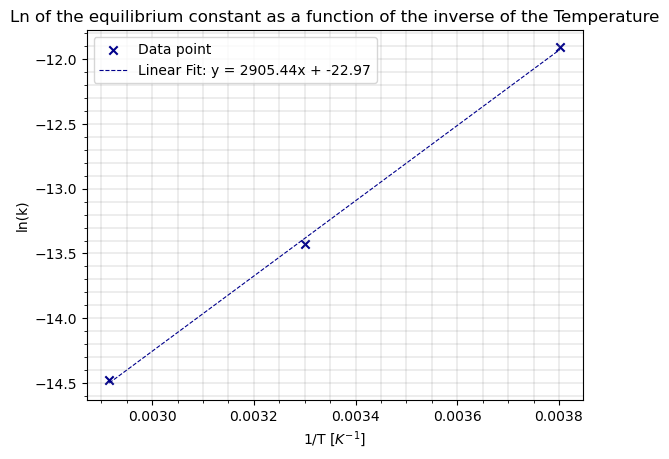

In [7]:
# Group the temperatures and K values in arrays

# Van't hoff equation: k(T)=k0 exp(-dH/RT)

Temperatures = np.array([263, 303, 343])
k_values = np.array([6.75e-06 , 1.48e-06, 5.16e-07])
ln_k_values = np.array([])
one_T_values = np.array([])


# We know that we need to plot lnk vs. 1/T

#adding the values of 1/t in the one_T_values array:
for t in Temperatures:
    Temp = 1/t
    one_T_values = np.append(Temp, one_T_values)


#adding the values of ln(k) in the ln_k_values array:
for k in k_values:
    ln_k = np.log(k)
    ln_k_values = np.append(ln_k, ln_k_values)




# Plot of lnk vs. 1/T
plt.scatter(one_T_values, ln_k_values, label="Data point", marker="x", color='Darkblue')
plt.title("Ln of the equilibrium constant as a function of the inverse of the Temperature")
plt.ylabel("ln(k)")
plt.xlabel("1/T [$K^{-1}$]")
plt.minorticks_on()  
plt.grid(which="both", linewidth="0.2", color="grey")

# Solve for the unknowns by linear fitting
coefficients = np.polyfit(one_T_values, ln_k_values, 1)  # This returns [slope= -dH/R, intercept=k_0]
slope, ln_k_o = coefficients

# Generate fitted y values using the line equation y = mx + c
y_fit = slope * one_T_values + ln_k_o

# Plot original data points and the fitted line
plt.plot(one_T_values, y_fit, label=f"Linear Fit: y = {slope:.2f}x + {ln_k_o:.2f}", color='darkblue', linewidth=0.8, linestyle="--")
plt.legend()

#the intercept is ln(k0) so we take the exponential to get the value of k0
k_o= np.exp(ln_k_o)


#the slope correspond to $-\frac{\Delta H}{R}$ so we multiplies the slope by -R with R=8.31 to get the activation energy $\DeltaH$
dH= - slope*8.31 


print(f"\n The value of ln(k0) is: {round(ln_k_o, 3)} and the value of k0 is: {round(k_o, 13)} 1/Pa")
print(f"\n The activation energy is: {round(dH)} J/mol")


#the data are:

header = ["k [1/Pa]".center(15), "ln(k)".center(10), "Temperatures [K] ".center(15), "1/T [1/K]".center(15)]

# Combine the data into rows
table_data = [[str(a).center(15), str(b).center(10), str(c).center(15), str(d).center(15)] for a,b,c,d in list(zip(k_values, ln_k_values, Temperatures,one_T_values))]


# Print the table
print(tabulate(table_data, headers=header, tablefmt="grid"))


# Print the results

#### Calculate Henry's coefficients for the different temperatures

In [8]:
# Calculating the Henry's coefficients
q=4.72 #mmol/g = mol/kg
Kh_T_values = ([])

#Kh = q*k0*exp(-dH/RT)

for t in one_T_values:
    Kh_T = q*k_o*(np.exp(-slope*t))
    Kh_T_values = np.append(Kh_T, Kh_T_values)

# Remember the formula for Kh (mmol/(g.Pa))

#print the results
header = ["Temperatures [K]".center(15), "Kh value".center(10)]

# Combine the data into rows
table_data = [[str(t).center(15), str(k).center(10)] for t, k in list(zip(Temperatures,(Kh_T_values)))]


# Print the table
print(tabulate(table_data, headers=header, tablefmt="grid"))

    




+--------------------+--------------+
|   Temperatures [K] |    Kh value  |
+====================+==============+
|          263       |  7.94151e-15 |
+--------------------+--------------+
|          303       |  3.41408e-14 |
+--------------------+--------------+
|          343       |  1.04453e-13 |
+--------------------+--------------+
